In [6]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle


In [7]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [9]:
df = pd.read_csv("C:/Users/Home/Desktop/khushii/insurance.csv")

In [10]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [13]:
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
fig = px.histogram(df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='Distribustion of BMI (Body Mass Index)')

fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(df,
                    x='expenses',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green', 'orange'],
                    title="Annual Medical Expenses")

fig.update_layout(bargap=0.1)
fig.show() 

In [18]:
fig = px.histogram(df,
                    x="expenses",
                    marginal="box",
                    color="sex",
                    color_discrete_sequence=["blue", "purple"],
                    title="Annual Medical Expenses by Sex")

fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig = px.histogram(df,
                    x="expenses",
                    marginal="box",
                    color="region",
                    color_discrete_sequence=["grey", "orange", "green","violet"],
                    title="Annual Medical Expenses by Region")

fig.update_layout(bargap=0.1)
fig.show() 

In [23]:

px.histogram(df, x="smoker", color="sex", title="Smoker")

In [24]:
px.histogram(df, x="region", color="smoker", title="Region")

In [25]:
px.histogram(df, x="smoker", color="children", title="Smoker Vs Children")

In [26]:
fig = px.scatter(df,
                x="age",
                y="expenses",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs Expenses")

fig.update_traces(marker_size=5)
fig.show() 

In [27]:
fig = px.scatter(df,
                x="bmi",
                y="expenses",
                color="smoker",
                hover_data=['sex'],
                opacity=0.8,
                width=800,
                height=500,
                title="BMI Vs Expenses")

fig.update_traces(marker_size=5)
fig.show() 

In [28]:
fig = px.scatter(df,
                x="bmi",
                y="expenses",
                color="smoker",
                hover_data=['region'],
                opacity=0.9,
                width=800,
                height=500,
                title= "BMI Vs Expenses")

fig.update_traces(marker_size=5)
fig.show() 

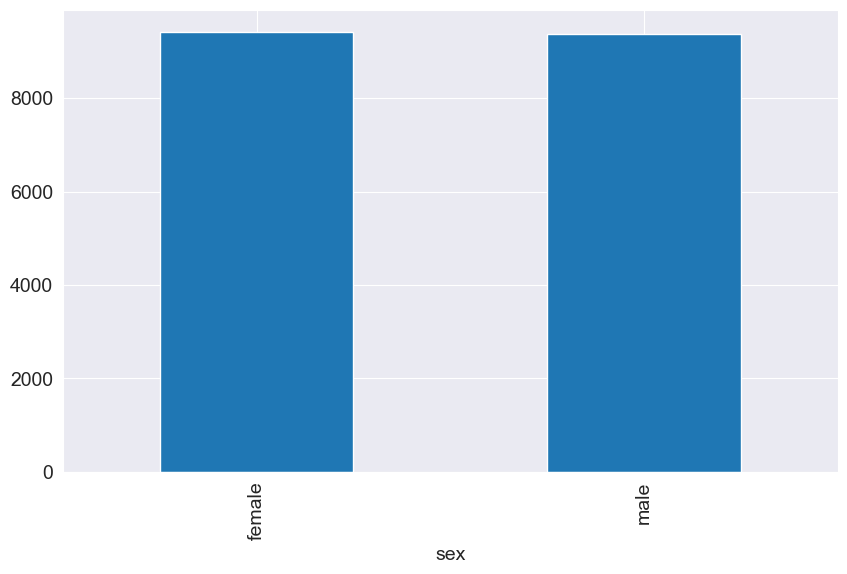

In [29]:
df.groupby("sex")['expenses'].median().plot.bar()
plt.show()

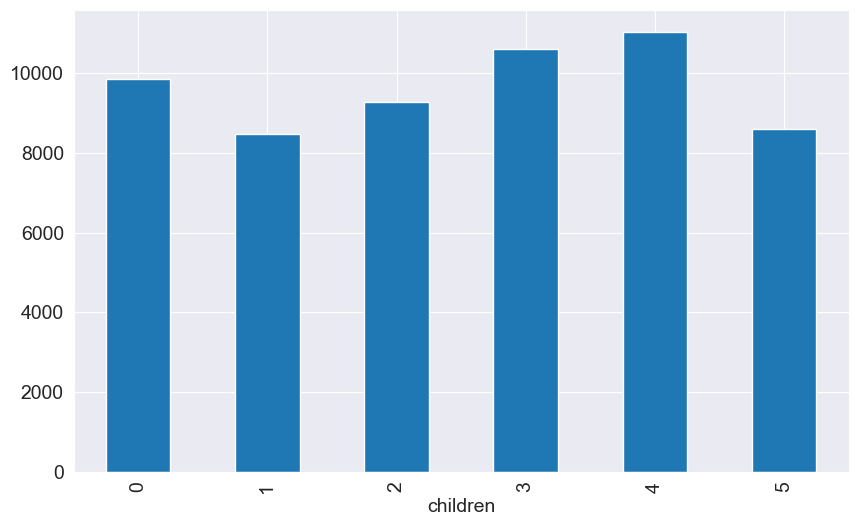

In [30]:
df.groupby("children")['expenses'].median().plot.bar()
plt.show()

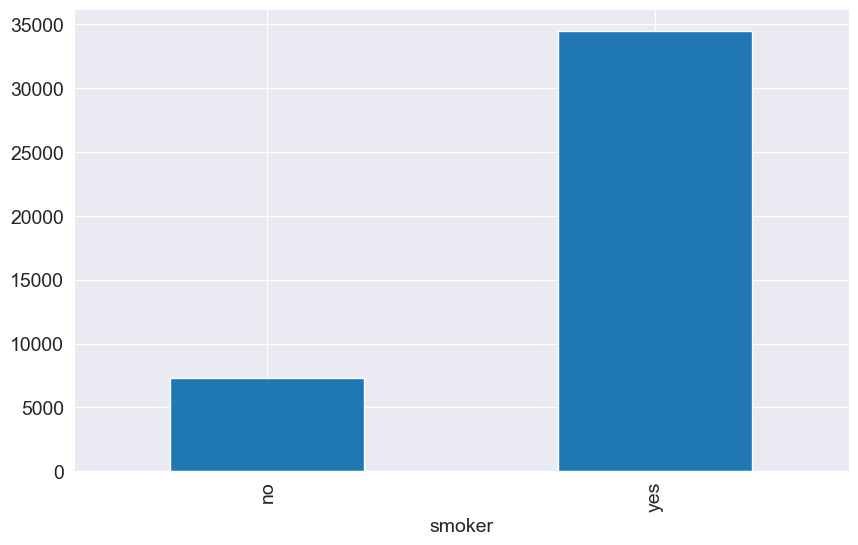

In [31]:
df.groupby("smoker")['expenses'].median().plot.bar()
plt.show()

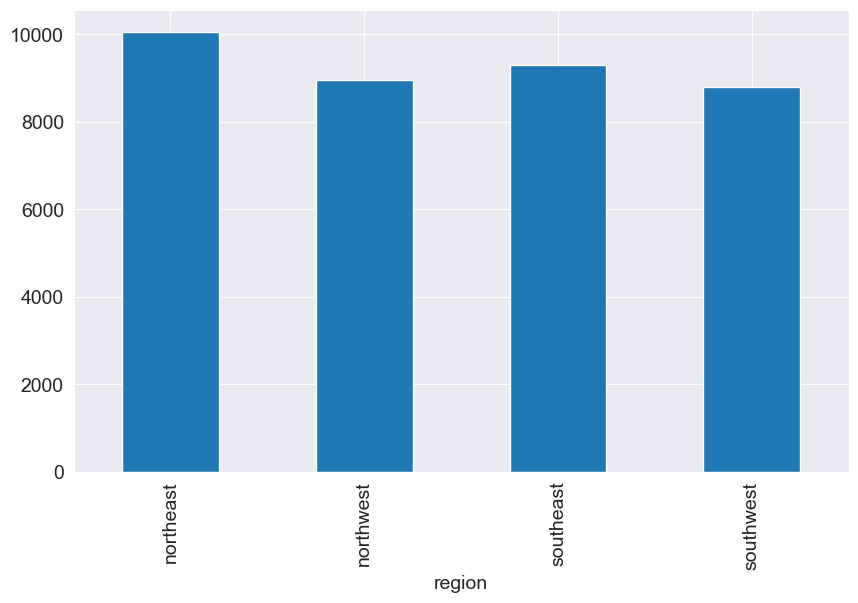

In [32]:
df.groupby("region")['expenses'].median().plot.bar()
plt.show()

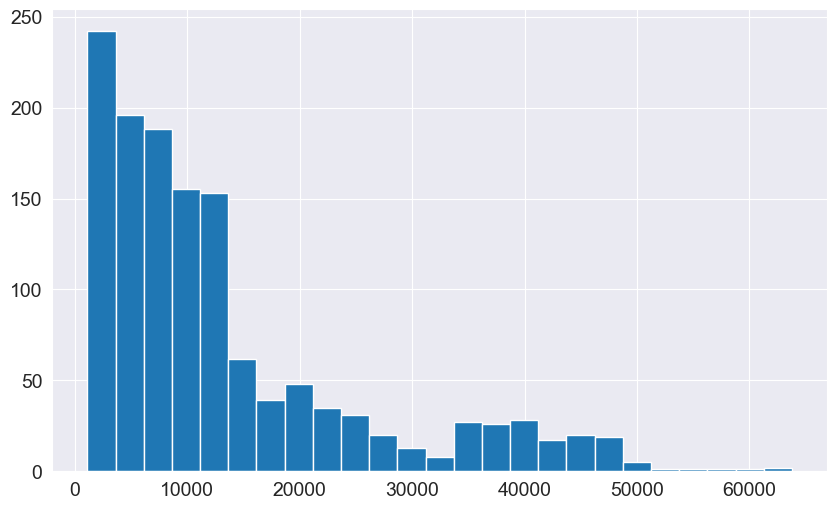

In [33]:
df['expenses'].hist(bins=25)
plt.show()

In [34]:
fig = px.histogram(data_frame=df, x='bmi', y='expenses', width=800, height=500, title='Expenses by BMI')
fig.show()

In [35]:
fig = px.histogram(df, x="bmi", y="expenses", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

In [36]:
fig = px.scatter(df, x="bmi", y="expenses", color='sex', facet_col="children")
fig.update_xaxes(matches=None)
fig.show()

In [37]:
fig = px.pie(data_frame=df, names='sex', values='expenses', width=800, height=500, title='Expenses by Gender')
fig.show()

In [38]:
fig = px.scatter(df, x="bmi", y="expenses", color="sex", width=900, height=500, title="Expenses by BMI & Gender")
fig.show()

In [39]:
fig = px.scatter(df, x="bmi", y="expenses", color="smoker", width=900, height=500, title="Expenses by BMI & Smoker")
fig.show()

In [40]:
fig = px.scatter(df, x="bmi", y="expenses", color="region", width=900, height=500, title="Expenses by BMI & Region")
fig.show()

In [41]:
fig = px.violin(df, y="expenses", x= "sex")
fig.show()

In [42]:
fig = px.violin(df, y="expenses", x= "smoker")
fig.show()

In [43]:
fig = px.scatter(df, x="bmi", y="expenses", color="sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [44]:
fig = px.scatter(df, x="bmi", y="expenses", color="smoker", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [45]:
fig = px.scatter(df, x="bmi", y="expenses", color="region", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [46]:
fig = px.box(df, x="children", y="expenses", color="smoker", notched=True, title= "Expenses by Children & Smoker")
fig.show()

In [48]:
df.corr(numeric_only=True)


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

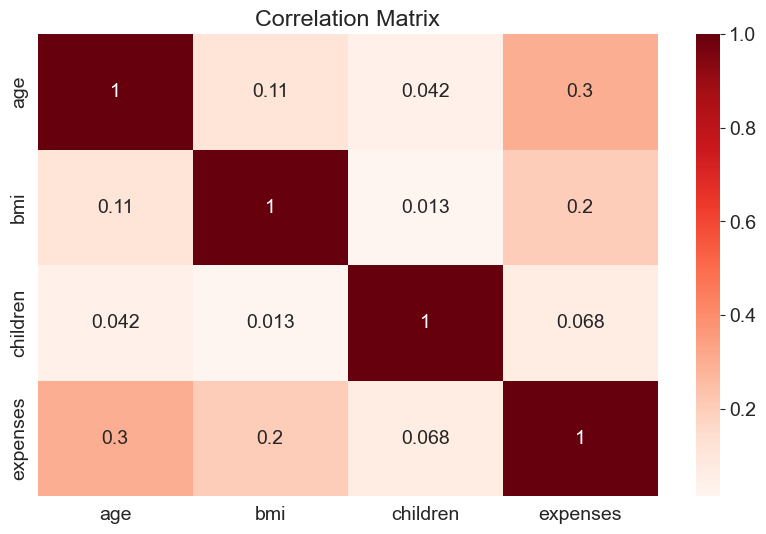

In [50]:
sns.heatmap(df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [51]:
df.expenses.corr(df.age)

0.2990081922850828

In [52]:
df.expenses.corr(df.bmi)

0.198576255018932

In [53]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.expenses.corr(smoker_numeric)

0.7872514298985531

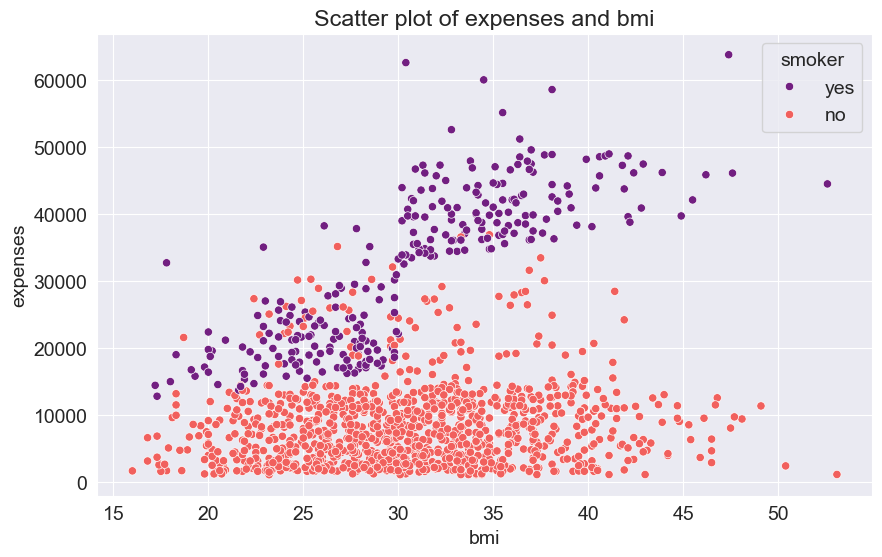

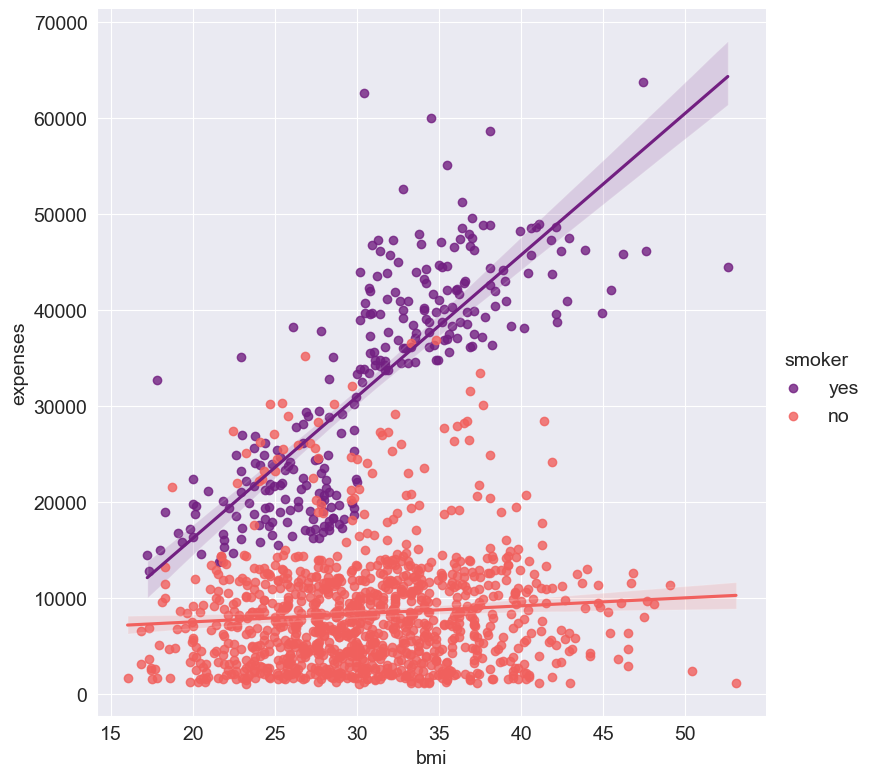

In [57]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of expenses and bmi')

sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df, palette='magma', height=8)


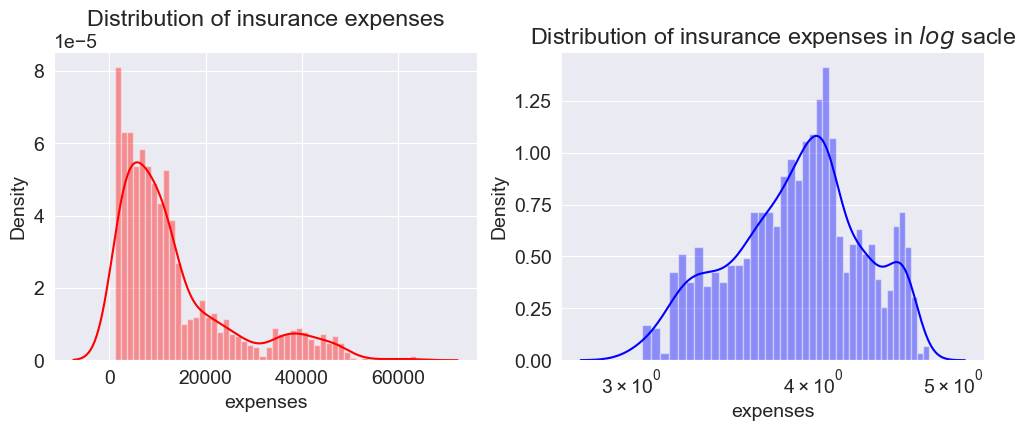

In [58]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');

In [59]:
X = df.drop(['expenses'], axis=1)
y = df['expenses']

In [60]:
X.to_csv('clean_data.csv')

In [61]:
# Creating new variables for numerical attributes/columns
numeric_features = ['age', 'bmi', 'children']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [62]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)

(1070, 6) (268,)


In [64]:
linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :33600065.35507784
The Root Mean Squared Error using Linear Regression :5796.556335884077
The r2_score using Linear Regression :0.7835726930039905


In [65]:
score = []
for i in range(1000):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=i)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(r2_score(y_test, y_pred))

In [66]:
np.argmax(score)

367

In [67]:
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 36656896.05543218
The Root Mean Squared Error using Decision Tree Regressor : 4867.310276315358
The r2_score using Decision Tree Regressor : 0.8387892658296556


In [68]:
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42))])
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 22326826.034284692
The Root Mean Squared Error using Random Forest Regressor : 4725.127091865857
The r2_score Error using Random Forest Regressor : 0.8480702300989443


In [69]:
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=30, max_depth=4, min_samples_split=5,random_state=42))])
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 22147774.06754165
The Root Mean Squared Error using Random Forest Regressor : 4706.142163974825
The r2_score Error using Random Forest Regressor : 0.8492886443986674


In [70]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor())])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 22705901.21209272
The Root Mean Squared Error using Gradient Boosting Regressor : 4765.070955619939
The r2_sccore using Gradient Boosting Regressor : 0.8454906962032112


In [71]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor(n_estimators=41, max_depth=3, min_samples_split=4, random_state=42))])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 21644204.04957958
The Root Mean Squared Error using Gradient Boosting Regressor : 4652.333183423086
The r2_sccore using Gradient Boosting Regressor : 0.8527153418092427


In [72]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

knn.fit(X_train, y_train)

# Predictiong The model
y_pred4 = knn.predict(X_test)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 33407923.373968963
The root mean squared error using KNN is 5779.958769227421
The r2_score using KNN is 0.7726654875491433


In [73]:
xgb_reg = Pipeline(steps=[('preprocessor', preprocessor),
                ('xgb', xgb.XGBRegressor())])

xgb_reg.fit(X_train, y_train)

# Predicting the moodel
y_pred5 = xgb_reg.predict(X_test)

# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)
xgb_reg_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgb_reg_r2_score = r2_score(y_test, y_pred5)

print("The mean square error using XGBoost is {}".format(xgb_reg_mse))
print("The root mean_squared error using XGBoost is {}".format(xgb_reg_rmse))
print("The r2 score using XGBoost is {}".format(xgb_reg_r2_score))

The mean square error using XGBoost is 33220338.149608932
The root mean_squared error using XGBoost is 5763.708714847492
The r2 score using XGBoost is 0.7739419690306621


In [ ]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN', 'XGBoost'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse, xgb_reg_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score, xgb_reg_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,4652.333183,0.852715
2,Random Forest,4706.142164,0.849289
1,Decision Tree,4867.310276,0.838789
5,XGBoost,5763.708715,0.773942
4,KNN,5779.958769,0.772665
0,Linear Regression,5796.556336,0.783573


In [76]:
pickle.dump(gradient_boosting_reg, open('gradient_boosting_regressor_model.pkl', 'wb'))